#Neuronal Network with NumPy

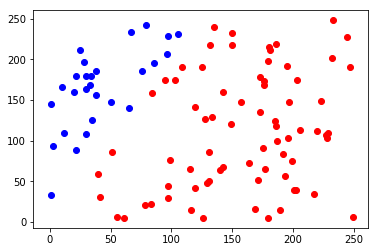

In [1]:
%matplotlib inline 
import numpy as np
from matplotlib import pyplot as plt

def lin(x):

    return  2 * x

def above_line(point, line_func):

    
    x, y = point
    if y > line_func(x):
        return 1
    else:
        return 0


points = np.random.randint(1, 250, (100, 2))    # initialize points in an array with 100 two-dimensional elements
cls = [[], []]   # prepare two clusters

for point in points:   # separate points in two clusters
    cls[above_line(point, lin)].append(tuple(point))
colors = ("r", "b")

for i in range(2):   # show input data
    X, Y = zip(*cls[i])
    plt.scatter(X, Y, c=colors[i])
    
plt.show()

In [2]:

class perceptron:
    def __init__(self):
        self.weights = np.random.uniform(0,1,2)
        
    learning_rate = 0.1
    
    def decison(self, point):
#         print(self.weights)
        weighted_inputs = np.dot(self.weights, point)
        weighted_sum = np.sum(weighted_inputs)
        if weighted_sum > 50:
            return 1
        else:
            return 0


In [3]:

class perceptron2(perceptron):
        
    def adjust(self, point):
        dec = self.decison(point)
        error = above_line(point, lin)-dec
        correction = error * point * self.learning_rate
        self.weights = self.weights + correction
        
    


In [4]:
p = perceptron2()

for point in points:
    p.adjust(point)
    
    
print("final weights: ", p.weights)

final weights:  [-41.64436334  23.59196162]


### Evaluation
Now we want so see how good our NN is. Write a code that checks how many points are correct or wrong evaluated by the NN and prints the results.

In [5]:

wrong_points = 0
for point in points:
    if (above_line(point, lin) != p.decison(point)):
        wrong_points = wrong_points+1
        
print("wrong points:" , wrong_points)

wrong points: 2


##### Checking different learning rates

In [6]:
def getwrongpoints(learnrate):
    p = perceptron2()
    p.learning_rate = learnrate
    for point in points:
        p.adjust(point)
    wrong_points = 0
    for point in points:
        if (above_line(point, lin) != p.decison(point)):
            wrong_points = wrong_points+1
    return wrong_points

z_bin = np.linspace(0.0, 5.0, 100)
test = list()
# print(z_bin)
for i in range(len(z_bin)-1):
    wp = getwrongpoints(z_bin[i])
    test.append(wp)
#     print(wp)

wparray = np.array(test)
print(wparray.reshape(1,-1))
    

[[74  0  2  0  2  0  0  0  0  2  0  2  0  2  2  2  2  2  2  2  0  0  0  2
   0  0  2  2  2  2  0  0  2  2  0  2  2  2  0  0  2  0  0  2  2  0  2  2
   0  0  2  2  2  0  0  0  2  2  0  0  2  2  0  2  2  0  2  0  0  0  0  2
   0  0  0  2  0  2  0  0  0  0  2  2  0  0  2  0  2  0  2  0  0  0  2  0
   0  0  0]]


#### changing learning rate doesn't make much difference

#Visualisation

1.76519290845


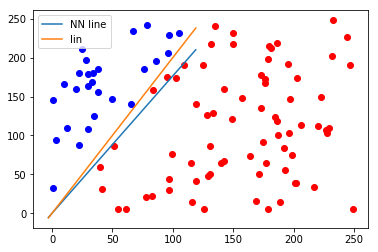

In [7]:
for i in range(2):
    X, Y = zip(*cls[i])
    plt.scatter(X, Y, c=colors[i])
    
X = np.arange(-3, 120)
    
m = -p.weights[0] / p.weights[1] # where p is the perceptron. Adjust this line for your code
print(m)

plt.plot(X, m*X, label="NN line")
plt.plot(X, lin(X), label="lin")
plt.legend()
plt.show()